## Extracting Classes from the Financial Documents

In [1]:
# File Operations
import os
import io
from os import listdir
from os.path import isfile, join
from io import StringIO
%matplotlib inline

# Data wrapper libraries
import pandas as pd
import numpy as np
from collections import Counter

#Data Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
import seaborn as sns

#Date time Libraries
import time
import datetime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [3]:
#Rendering Exhibit text from the file corpus
k=0
os.chdir('C:\\Users\\Anurag\\Documents\\Key Docs Physical Files')
keydocs_df=pd.DataFrame(columns=(['versionid','exhibit','text']))
for file in glob.glob("*.txt"):
    print(file)
    a=file
    with open(file, "r",encoding='utf-8', errors='ignore') as input_data:
        for line in input_data:
            for line in input_data:
                if line.lower().startswith('<type>ex-'):
                    keydocs_df.loc[k,['versionid']]=os.path.splitext(a)[0]
                    keydocs_df.loc[k,['exhibit']]=line[6:]
                    break
            b=""
            for line in input_data:
                b+=line
                if line.lower().startswith('</text>'):
                    break 
            keydocs_df.loc[k,['text']]=b
            k+=1

112108432.txt
116691276.txt
122111574.txt
1266796387.txt
1276855369.txt
1291052101.txt
1309578991.txt
132850670.txt
141534032.txt
1426806463.txt
143313054.txt
1447139911.txt
1473555425.txt
1473695983.txt
1475663373.txt
1525043845.txt
1529110685.txt
1539284987.txt
155231342.txt
155847218.txt
159443854.txt
160335290.txt
1667342599.txt
1676900017.txt
169338994.txt
171627090.txt
171643138.txt
171698238.txt
1730534775.txt
1756137773.txt
175710516.txt
1792614663.txt
181616862.txt
1819755543.txt
185838310.txt
1863219765.txt
187195540.txt
1876158025.txt
1878992225.txt
1886832435.txt
1900741851.txt
1916301463.txt
1920085917.txt
1923436111.txt
1925373479.txt
1942403613.txt
1947207745.txt
1947651379.txt
1952877525.txt
1961308457.txt
1972734165.txt
1976897431.txt
1987955239.txt
199298524.txt
199362336.txt
201229364.txt
202669830.txt
202670996.txt
204513498.txt
204735506.txt
204857268.txt
206107264.txt
206194336.txt
206374860.txt
206442862.txt
206998042.txt
207275236.txt
207388278.txt
208137234.txt

301838260.txt
301854218.txt
301863728.txt
301866456.txt
301877828.txt
301879988.txt
301880562.txt
303782722.txt
303790268.txt
303791316.txt
303891606.txt
303952370.txt
303998316.txt
303998878.txt
304510754.txt
304538364.txt
304540158.txt
304629400.txt
305089438.txt
305136386.txt
305137012.txt
306061766.txt
306161052.txt
306233464.txt
306255116.txt
306256512.txt
306259954.txt
306275710.txt
306875456.txt
307432536.txt
307433684.txt
308514828.txt
310746520.txt
311127436.txt
311131016.txt
311142250.txt
311146130.txt
311181952.txt
311182824.txt
311198054.txt
312336608.txt
312388828.txt
312392268.txt
312429028.txt
312467908.txt
312467992.txt
312511714.txt
312513452.txt
312519280.txt
313321278.txt
313782598.txt
314704668.txt
314947760.txt
315089284.txt
315337322.txt
315409652.txt
319095448.txt
319099188.txt
319117196.txt
319118366.txt
319158112.txt
319272230.txt
319500792.txt
319723270.txt
319728252.txt
320223232.txt
320223514.txt
320383444.txt
320641672.txt
320750004.txt
320933534.txt
321586

400976246.txt
400978030.txt
400978754.txt
400979514.txt
400979698.txt
400982858.txt
400982914.txt
400984446.txt
400984516.txt
400985200.txt
400985724.txt
400988146.txt
401421566.txt
401422664.txt
401431590.txt
401451776.txt
401461124.txt
401462800.txt
401503532.txt
401697156.txt
401829952.txt
401844824.txt
401845736.txt
401858628.txt
401860878.txt
401867876.txt
401886726.txt
401886860.txt
401886996.txt
401893670.txt
401894422.txt
402506174.txt
402509934.txt
402511178.txt
402511568.txt
402515350.txt
402598732.txt
402634166.txt
402692190.txt
402707122.txt
402764140.txt
402791018.txt
402810604.txt
402844378.txt
403354254.txt
403365100.txt
403375776.txt
403377080.txt
403386688.txt
403398668.txt
403411816.txt
403426810.txt
403435048.txt
403436416.txt
403442780.txt
403444594.txt
403445184.txt
404012310.txt
404013258.txt
404014778.txt
404018346.txt
404019688.txt
404033692.txt
404048354.txt
404076848.txt
404164878.txt
404204470.txt
404205648.txt
404214504.txt
404228246.txt
404269568.txt
404376

422137352.txt
422173810.txt
422192728.txt
422264920.txt
422276460.txt
422281172.txt
422283216.txt
422290404.txt
422306778.txt
422313740.txt
422314306.txt
422318780.txt
422319480.txt
422325112.txt
422326028.txt
422333686.txt
422335040.txt
422336174.txt
422338984.txt
422341172.txt
422342456.txt
422343420.txt
422345234.txt
422345404.txt
422357328.txt
422360582.txt
422361110.txt
422361160.txt
422361714.txt
422361776.txt
422361778.txt
422362476.txt
422362606.txt
422364416.txt
422366688.txt
422369100.txt
424215188.txt
424218008.txt
424219366.txt
424222038.txt
424222184.txt
424222276.txt
424222288.txt
424223352.txt
424223906.txt
424226534.txt
424248858.txt
424295260.txt
424311282.txt
424334590.txt
424335436.txt
424365780.txt
424370186.txt
424415112.txt
424423244.txt
424447156.txt
424472310.txt
424487266.txt
424523244.txt
424539436.txt
424540324.txt
424566176.txt
424568628.txt
424568808.txt
424570898.txt
424570994.txt
424571516.txt
424572208.txt
424574104.txt
424574482.txt
424574694.txt
424575

432870712.txt
432870946.txt
432871980.txt
432872098.txt
432872138.txt
432875210.txt
432882538.txt
432884814.txt
432888996.txt
432892098.txt
432892184.txt
432894666.txt
432896876.txt
432897288.txt
432897562.txt
432900734.txt
432906528.txt
432907826.txt
432909926.txt
432912172.txt
432912908.txt
432915172.txt
432915576.txt
432924564.txt
432926052.txt
432926342.txt
432930576.txt
432951698.txt
432953614.txt
432955284.txt
432956172.txt
433515212.txt
433556944.txt
433566926.txt
433572310.txt
433573340.txt
433573664.txt
433575688.txt
433700860.txt
433730000.txt
433735040.txt
433741762.txt
433932708.txt
433936396.txt
434005950.txt
434014204.txt
434018390.txt
434037066.txt
434039782.txt
434083730.txt
434098156.txt
434106696.txt
434119074.txt
434127604.txt
434128280.txt
434129906.txt
434131286.txt
434133258.txt
434137072.txt
435010868.txt
435013582.txt
435015864.txt
435017872.txt
435148812.txt
435257532.txt
435414334.txt
435449460.txt
435460044.txt
435483118.txt
435485252.txt
435506930.txt
435566

457099628.txt
457170744.txt
457191118.txt
457251956.txt
457259770.txt
457325280.txt
457327170.txt
457339572.txt
457348164.txt
457358340.txt
457360882.txt
457365098.txt
457367236.txt
457368840.txt
457373640.txt
457374002.txt
457374136.txt
457374746.txt
457374820.txt
457378250.txt
457391482.txt
457397666.txt
457399560.txt
457403286.txt
457404862.txt
457407758.txt
457409002.txt
457856766.txt
457857538.txt
457861510.txt
457864866.txt
457864874.txt
457865026.txt
457896598.txt
457907722.txt
458009850.txt
458057414.txt
458112486.txt
458114476.txt
458154436.txt
458167926.txt
458170714.txt
458180986.txt
458183138.txt
458204024.txt
458242692.txt
458254908.txt
458284196.txt
458286744.txt
458293546.txt
458316122.txt
458318108.txt
458322674.txt
458323030.txt
458323264.txt
458324478.txt
458324866.txt
458325738.txt
458327700.txt
458331560.txt
458331770.txt
458332306.txt
458332588.txt
458333290.txt
458333294.txt
458334240.txt
458335222.txt
458337400.txt
458337492.txt
458340300.txt
458341130.txt
458345

472653862.txt
472666466.txt
472667998.txt
472705510.txt
472726394.txt
472797120.txt
472818362.txt
472938878.txt
472955774.txt
472966284.txt
472969168.txt
472983652.txt
472983866.txt
472984072.txt
472991518.txt
472996732.txt
472996866.txt
472998944.txt
472999000.txt
473000186.txt
473003454.txt
473010278.txt
473021922.txt
473023952.txt
473025266.txt
473025560.txt
473025562.txt
473026300.txt
473028770.txt
473577516.txt
473582486.txt
473583792.txt
473583820.txt
473609968.txt
473622198.txt
473644712.txt
473646560.txt
473700448.txt
473755182.txt
473785952.txt
474010814.txt
474050268.txt
474070058.txt
474078876.txt
474079134.txt
474079144.txt
474081238.txt
474082048.txt
474082834.txt
474090172.txt
474091494.txt
474092280.txt
474096162.txt
474100226.txt
474101060.txt
474107310.txt
474115446.txt
474118046.txt
474119236.txt
474120188.txt
474692168.txt
474734332.txt
474785068.txt
474785948.txt
474788146.txt
474863602.txt
474865840.txt
474896712.txt
474972178.txt
474987420.txt
475011468.txt
475012

489952740.txt
489953732.txt
489953742.txt
489954908.txt
490411306.txt
490420028.txt
490420198.txt
490421698.txt
490422162.txt
490422376.txt
490552976.txt
490687412.txt
490694180.txt
490705786.txt
490725182.txt
490743428.txt
490747194.txt
490756190.txt
490779920.txt
490796156.txt
490799260.txt
490804362.txt
490806390.txt
490807204.txt
490808246.txt
490810834.txt
490811020.txt
490811638.txt
490820402.txt
490830728.txt
490833674.txt
491242102.txt
491248152.txt
491250892.txt
491321416.txt
491372706.txt
491396574.txt
491409352.txt
491487740.txt
491522960.txt
491543736.txt
491598456.txt
491603442.txt
491605788.txt
491608830.txt
491615608.txt
491616674.txt
491632182.txt
491635406.txt
491635516.txt
491635914.txt
491636118.txt
491638876.txt
491638962.txt
491641254.txt
491641322.txt
491641406.txt
491647816.txt
491647982.txt
491648004.txt
491648080.txt
491648256.txt
491649120.txt
491649496.txt
491649596.txt
491649924.txt
491654080.txt
491657948.txt
491659124.txt
491662214.txt
491666088.txt
491672

506444164.txt
506449472.txt
506451140.txt
506451534.txt
506451582.txt
506454100.txt
506454166.txt
506457252.txt
506458734.txt
506460974.txt
506462250.txt
506464472.txt
506466220.txt
506467604.txt
506468824.txt
506471578.txt
506471808.txt
506478692.txt
506480982.txt
506483862.txt
506483876.txt
506484356.txt
506486022.txt
506486146.txt
506488240.txt
506494298.txt
506495660.txt
506904342.txt
507001298.txt
507002630.txt
507009018.txt
507011958.txt
507041148.txt
507047388.txt
507055110.txt
507065176.txt
507110400.txt
507114122.txt
507181362.txt
507190670.txt
507190676.txt
507202870.txt
507215028.txt
507219814.txt
507231694.txt
507233712.txt
507243906.txt
507251422.txt
507259234.txt
507259662.txt
507260634.txt
507263180.txt
507268920.txt
507272038.txt
507272404.txt
507274368.txt
507277372.txt
507279694.txt
507286280.txt
507287532.txt
507288520.txt
507289896.txt
507291040.txt
507291178.txt
507291664.txt
507299130.txt
507300846.txt
507302046.txt
507302068.txt
507304400.txt
507304926.txt
507311

518747834.txt
518747846.txt
518756110.txt
518757462.txt
518759568.txt
518762434.txt
518763870.txt
518764578.txt
518765212.txt
518766012.txt
518769830.txt
518770684.txt
518771014.txt
518771198.txt
518773744.txt
518773808.txt
518774302.txt
518775016.txt
518778550.txt
518778852.txt
518779942.txt
519233358.txt
519235290.txt
519236530.txt
519238580.txt
519239412.txt
519242748.txt
519307930.txt
519324222.txt
519357584.txt
519365762.txt
519375576.txt
519377294.txt
519430352.txt
519462624.txt
519468620.txt
519483642.txt
519516334.txt
519537128.txt
519552756.txt
519594866.txt
519596338.txt
519610214.txt
519617640.txt
519621066.txt
519629194.txt
519633262.txt
519633284.txt
519633624.txt
519634468.txt
519634472.txt
519636472.txt
519636836.txt
519636860.txt
519638064.txt
519638088.txt
519639010.txt
519640162.txt
519641150.txt
519643726.txt
519646506.txt
519646574.txt
519647754.txt
519652630.txt
519654192.txt
519655178.txt
519655628.txt
519659922.txt
519662318.txt
519662698.txt
519665032.txt
519668

536731894.txt
536779772.txt
536782396.txt
536798050.txt
536811820.txt
536874648.txt
536888166.txt
536928448.txt
536944022.txt
536966832.txt
537010474.txt
537010538.txt
537045240.txt
537058198.txt
537065934.txt
537076764.txt
537078716.txt
537079892.txt
537080746.txt
537081856.txt
537083528.txt
537083798.txt
537086064.txt
537086342.txt
537088260.txt
537091530.txt
537092362.txt
537094162.txt
537096896.txt
537099664.txt
537099704.txt
537102678.txt
537102918.txt
537104314.txt
537104668.txt
538098360.txt
538099530.txt
538106058.txt
538114362.txt
538120600.txt
538177532.txt
538180830.txt
538238774.txt
538304058.txt
538345650.txt
538398214.txt
538428838.txt
538473656.txt
538479122.txt
538513900.txt
538513978.txt
538515328.txt
538516674.txt
538518014.txt
538520158.txt
538521568.txt
538530010.txt
538534030.txt
538538762.txt
538540244.txt
538542450.txt
538544464.txt
538545328.txt
538546200.txt
538548514.txt
538953132.txt
538957162.txt
538959900.txt
538976540.txt
539026410.txt
539028958.txt
539079

In [4]:
keydocs_df=keydocs_df.dropna()
keydocs_df["exhibit"]=keydocs_df["exhibit"].apply(lambda x:x[:-1])
keydocs_df["text"]=keydocs_df["text"].apply(lambda x:x.replace("\n",""))
keydocs_df["text"]=keydocs_df["text"].apply(lambda x:x.replace("<SEQUENCE>",""))

In [5]:
keydocs_df.shape

(36701, 3)

In [6]:
keydocs_df.head(3)

,versionid,exhibit,text
0,112108432,EX-3.01,2CERTIFICATE OF AMENDMENT TO ARTICLES OF INCOR...
2,116691276,EX-3.1,2EX-3.1 ...
3,116691276,EX-10.1,3EX-10.1 ...


In [7]:
keydocs_security=pd.read_excel("C:\\Users\\Anurag\\Documents\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="Security")
keydocs_corporate=pd.read_excel("C:\\Users\\Anurag\\Documents\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="Corporate")
keydocs_mna=pd.read_excel("C:\\Users\\Anurag\\Documents\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="M&A")
keydocs_keycust=pd.read_excel("C:\\Users\\Anurag\\Documents\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="KeyCustomer")
keydocs_employ=pd.read_excel("C:\\Users\\Anurag\\Documents\\KeyDocs_Sample Metadata_01112019.xlsx",sheet_name="Employment")
keydocs_master=pd.concat([keydocs_security,keydocs_corporate,keydocs_mna,keydocs_keycust,keydocs_employ])

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
keydocs_master.columns

Index(['AccessionNumber', 'AmendmentFlag', 'CompanyId', 'CompanyName',
       'CreationDateUTC', 'DocumentId', 'FilingDateDateTime',
       'Form Of Agreement', 'KeyDocumentGroupName', 'KeyDocumentId',
       'KeyDocumentName', 'KeyDocumentTypeName', 'PersonName', 'ProId',
       'RelationTypeDescription', 'SecurityId(Linked)', 'SecurityName',
       'SecurityTypeName', 'Title', 'VersionId', 'exhibitTypeName',
       'securityName', 'securitySubTypeName', 'transactionId (Linked)',
       'transactionIdTypeName'],
      dtype='object')

In [9]:
keydocs_master[["VersionId","exhibitTypeName","KeyDocumentGroupName"]].head(4)

,VersionId,exhibitTypeName,KeyDocumentGroupName
0,389160404,EX-1.1,Security Holder Rights and Agreements
1,389160404,EX-4.1,Security Holder Rights and Agreements
2,389162750,EX-10.1,Security Holder Rights and Agreements
3,389162750,EX-10.2,Security Holder Rights and Agreements


In [10]:
keydocs_master.shape

(10932, 25)

In [11]:
keydocs_master["exhibitTypeName"]=keydocs_master["exhibitTypeName"].apply(lambda x:x.strip())
keydocs_df["exhibit"]=keydocs_df["exhibit"].apply(lambda x:x.strip())

In [12]:
keydocs_master.KeyDocumentGroupName.value_counts()

Corporate Agreements                     3443
Security Holder Rights and Agreements    3308
Employment Related Agreements            2508
KeyCustomer & Supplier Contracts         1226
M&A Agreements                            447
Name: KeyDocumentGroupName, dtype: int64

In [13]:
keydocs_df.dtypes

versionid    object
exhibit      object
text         object
dtype: object

In [14]:
keydocs_df["versionid"]=pd.to_numeric(keydocs_df["versionid"])

In [15]:
keydocs_final=pd.merge(keydocs_df,keydocs_master[["VersionId","exhibitTypeName","KeyDocumentGroupName"]],left_on = ['versionid','exhibit'], right_on = ['VersionId','exhibitTypeName'])

In [16]:
keydocs_final.shape

(12236, 6)

In [17]:
keydocs_final.KeyDocumentGroupName.value_counts()

Corporate Agreements                     3452
Security Holder Rights and Agreements    3373
Employment Related Agreements            2650
KeyCustomer & Supplier Contracts         2314
M&A Agreements                            447
Name: KeyDocumentGroupName, dtype: int64

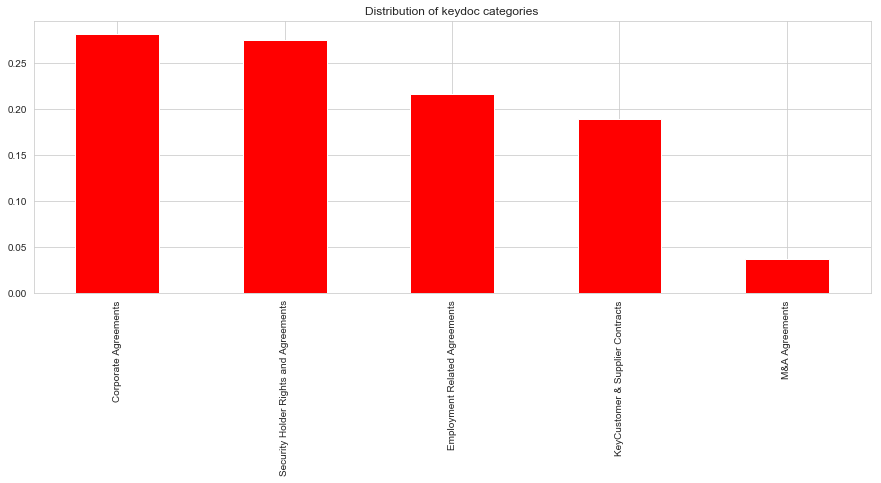

In [18]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
(keydocs_final.KeyDocumentGroupName.value_counts()/len(keydocs_final)).plot(title="Distribution of keydoc categories",kind='bar',color='red')
plt.show()

In [19]:
keydocs_final=keydocs_final[["VersionId","exhibitTypeName","text","KeyDocumentGroupName"]]

In [20]:
keydocs_final.head(2)

,VersionId,exhibitTypeName,text,KeyDocumentGroupName
0,112108432,EX-3.01,2CERTIFICATE OF AMENDMENT TO ARTICLES OF INCOR...,Corporate Agreements
1,116691276,EX-3.1,2EX-3.1 ...,Corporate Agreements


In [21]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#Text preprocessing
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        keydocs_final[column][index] = string

In [23]:
#text processing stage.
start_time = time.clock()
for index, row in keydocs_final.iterrows():
    if type(row['text']) is str:
        nlp_preprocessing(row['text'], index, 'text')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Time took for preprocessing the text : 3321.430112874 seconds


C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [24]:
keydocs_final["text"]=keydocs_final["text"].apply(lambda x:re.sub("html","",x))
keydocs_final["text"]=keydocs_final["text"].apply(lambda x:re.sub("text","",x))

In [25]:
keydocs_final.head(2)

,VersionId,exhibitTypeName,text,KeyDocumentGroupName
0,112108432,EX-3.01,2certificate amendment articles incorporatione...,Corporate Agreements
1,116691276,EX-3.1,2ex 3 1 exhibit 3 1 amendment 6 fifth amended ...,Corporate Agreements


In [26]:
keydocs_final.KeyDocumentGroupName.unique()

array(['Corporate Agreements', 'KeyCustomer & Supplier Contracts',
       'Employment Related Agreements', 'M&A Agreements',
       'Security Holder Rights and Agreements'], dtype=object)

In [27]:
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="Security Holder Rights and Agreements",value=1)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="Corporate Agreements",value=2)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="M&A Agreements",value=3)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="KeyCustomer & Supplier Contracts",value=4)
keydocs_final["KeyDocumentGroupName"]=keydocs_final["KeyDocumentGroupName"].replace(to_replace="Employment Related Agreements",value=5)

In [28]:
keydocs_final.KeyDocumentGroupName.unique()

array([2, 4, 5, 3, 1], dtype=int64)

In [29]:
#Train-CV-Test Split
y_true = keydocs_final['KeyDocumentGroupName'].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(keydocs_final, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [30]:
y_true

array([2, 2, 4, ..., 1, 4, 4], dtype=int64)

In [31]:
print(X_train.shape)
print(cv_df.shape)
print(test_df.shape)

(9788, 4)
(1958, 4)
(2448, 4)


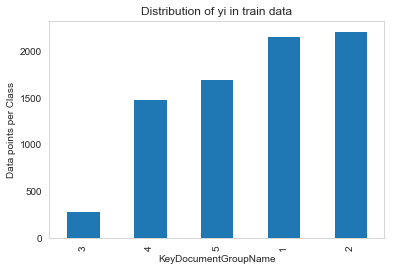

Number of data points in KeyDocumentGroupName 5 : 2209 ( 28.212 %)
Number of data points in KeyDocumentGroupName 4 : 2158 ( 27.561 %)
Number of data points in KeyDocumentGroupName 3 : 1696 ( 21.66 %)
Number of data points in KeyDocumentGroupName 2 : 1481 ( 18.914 %)
Number of data points in KeyDocumentGroupName 1 : 286 ( 3.653 %)
--------------------------------------------------------------------------------


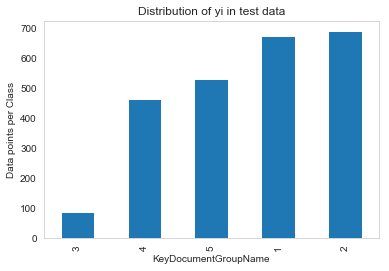

Number of data points in class 5 : 691 ( 28.227 %)
Number of data points in class 4 : 675 ( 27.574 %)
Number of data points in class 3 : 530 ( 21.65 %)
Number of data points in class 2 : 463 ( 18.913 %)
Number of data points in class 1 : 89 ( 3.636 %)
--------------------------------------------------------------------------------


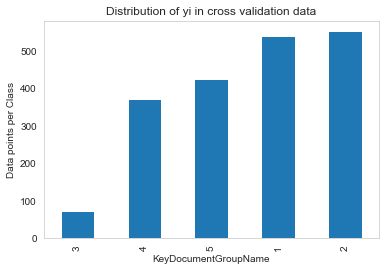

Number of data points in class 5 : 552 ( 28.192 %)
Number of data points in class 4 : 540 ( 27.579 %)
Number of data points in class 3 : 424 ( 21.655 %)
Number of data points in class 2 : 370 ( 18.897 %)
Number of data points in class 1 : 72 ( 3.677 %)


In [32]:
train_class_distribution = train_df['KeyDocumentGroupName'].value_counts().sort_values()
test_class_distribution = test_df['KeyDocumentGroupName'].value_counts().sort_values()
cv_class_distribution = cv_df['KeyDocumentGroupName'].value_counts().sort_values()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('KeyDocumentGroupName')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in KeyDocumentGroupName', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('KeyDocumentGroupName')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

#TEST
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('KeyDocumentGroupName')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

#CV
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [33]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(X_train['text'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 153356


In [34]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [35]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of words of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of words of Cross Validation appeared in train data")

97.72 % of words of test data appeared in train data
100.0 % of words of Cross Validation appeared in train data


In [36]:
#Text Featurization
vect_word = CountVectorizer(max_features=10000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = CountVectorizer(max_features=20000, lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [37]:
# Word ngram vector
start_time = time.clock()
tr_vect = vect_word.fit_transform(train_df['text'])
ts_vect = vect_word.transform(test_df['text'])

# Character n gram vector
tr_vect_char = vect_char.fit_transform(train_df['text'])
ts_vect_char = vect_char.transform(test_df['text'])

#Ignore the gc warning below
cv_vect=vect_word.transform(cv_df['text'])
cv_vect_char=vect_char.transform(cv_df['text'])
print('Time took for vectorizing :',time.clock() - start_time, "seconds")

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Time took for vectorizing : 1567.775121699 seconds


C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


In [38]:
vect_word.get_feature_names()[1000:1010]

['applicable shall',
 'applicable site',
 'applicable standard',
 'applicable state',
 'applicable state securities',
 'applicable thereto',
 'applicable time',
 'applicablelaw',
 'application',
 'applications']

In [39]:
tr_vect.get_shape()

(7830, 10000)

In [40]:
from scipy import sparse
X = sparse.hstack([tr_vect, tr_vect_char])
x_cv=sparse.hstack([cv_vect, cv_vect_char])
x_test = sparse.hstack([ts_vect, ts_vect_char])
y=train_df.KeyDocumentGroupName.values
y_cv=cv_df.KeyDocumentGroupName.values
y_test=test_df.KeyDocumentGroupName.values

In [41]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix ", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix ", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [44]:
X_train.head()

,VersionId,exhibitTypeName,text,KeyDocumentGroupName
5039,432580288,EX-3.2,2 exhibit 3 2 amended restated bylaws imports ...,2
9776,507956738,EX-10.9,5exhibit 10 9exhibit 10 9employment agreementt...,5
6412,460518828,EX-10.4,5exhibit 10 4exhibit 10 4restricted stock agre...,5
5499,441994646,EX-3.1,2amended restated memorandum articles associat...,2
8612,491632182,EX-3.1,2ex 3 1 exhibit 3 1 amended restated certifica...,2


In [46]:
# fit model on test data
model = XGBClassifier()
model.fit(x_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [50]:
# fit model on cv data
model = XGBClassifier()
model.fit(x_cv,y_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
xt_pred = model.predict(x_test)
predictions_xt = [round(value) for value in xt_pred]

In [51]:
xc_pred = model.predict(x_cv)
predictions_xc = [round(value) for value in xc_pred]

In [53]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions_xt)
print("Accuracy on test_data: %.2f%%" % (accuracy * 100.0))

Accuracy on test_data: 98.98%


In [54]:
# evaluate predictions
accuracy = accuracy_score(y_cv, predictions_xc)
print("Accuracy on cv_data: %.2f%%" % (accuracy * 100.0))

Accuracy on cv_data: 99.54%


-------------------- Confusion matrix --------------------


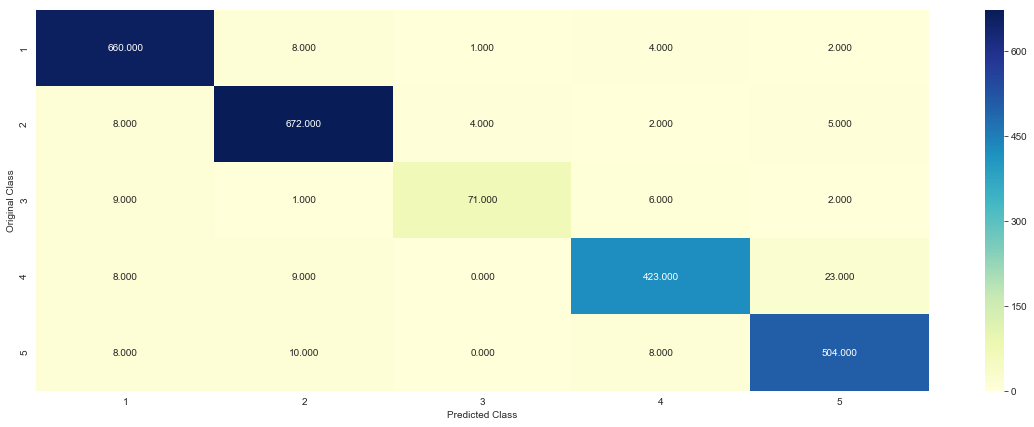

-------------------- Precision matrix  --------------------


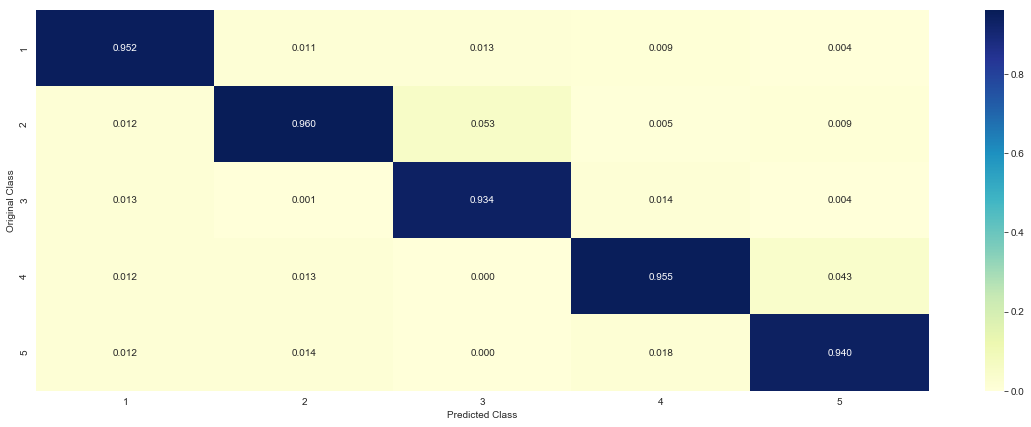

-------------------- Recall matrix  --------------------


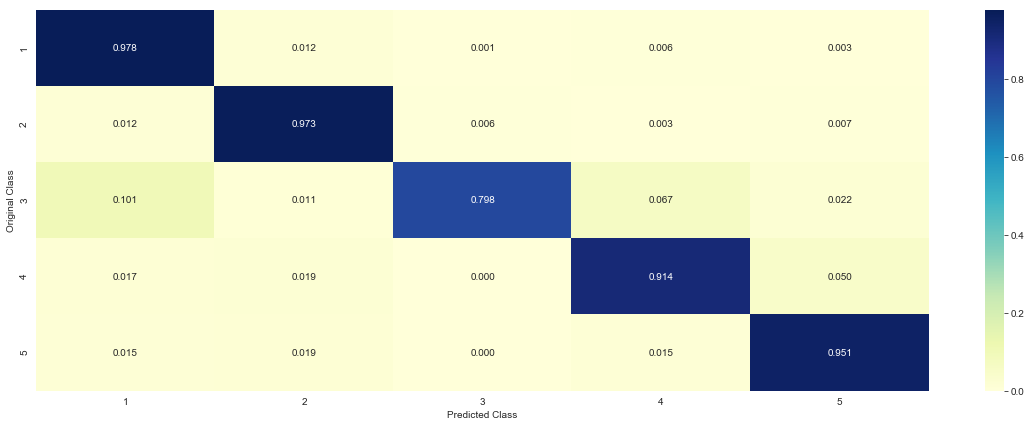

In [55]:
plot_confusion_matrix(y_test,model.predict(x_test))